<a href="https://colab.research.google.com/github/Aditya11013/machine-learning/blob/main/Kudupudi_D_V_Sai_Aditya_Programming_Assignment_04_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)


# Extract data and labels
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

##################################################
#Define the architecture
##################################################

# Define ReLU activation function
def ReLU(x):
    return np.maximum(0, x)

# Define softmax activation function
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Forward propagation
def fwdPropagate(inputs, weights):
    W1, W2, W3 = weights
    l1 = np.dot(inputs, W1)
    a1 = ReLU(l1)
    l2 = np.dot(a1, W2)
    a2 = ReLU(l2)
    l3 = np.dot(a2, W3)
    a3 = softmax(l3)
    return [l1, a1, l2, a2, l3, a3]

# Compute gradients
def computeGradients(inputs, targets, weights, activations):
    W1, W2, W3 = weights
    l1, a1, l2, a2, l3, a3 = activations

    m = inputs.shape[0]
    scores = softmax(l3)
    correct_scores = scores[range(m), targets]
    loss = -np.mean(np.log(correct_scores + 1e-8))

    dj_dl3 = scores.copy()
    dj_dl3[range(m), targets] -= 1
    dj_dl3 /= m

    dj_dw3 = np.dot(a2.T, dj_dl3)
    dj_da2 = np.dot(dj_dl3, W3.T)
    dj_dl2 = dj_da2 * (l2 > 0)
    dj_dw2 = np.dot(a1.T, dj_dl2)
    dj_da1 = np.dot(dj_dl2, W2.T)
    dj_dl1 = dj_da1 * (l1 > 0)
    dj_dw1 = np.dot(inputs.T, dj_dl1)

    return [dj_dw1, dj_dw2, dj_dw3],loss

# Update weights
def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    return [W1, W2, W3]

# Backpropagation
def backPropagate(inputs, targets, weights,activations, learning_rate):
    gradients,loss = computeGradients(inputs, targets, weights, activations)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights,loss
##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    num_samples = inputs.shape[0]
    split_index = int(num_samples * train_val_split)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets_idx[:split_index], targets_idx[split_index:]

    # Define weight shapes
    W1_shape = (784, 512)
    W2_shape = (512, 512)
    W3_shape = (512, 10)

    # Initialize weights
    W1 = np.random.randn(*W1_shape) * 0.01
    W2 = np.random.randn(*W2_shape) * 0.01
    W3 = np.random.randn(*W3_shape) * 0.01
    weights = [W1, W2, W3]

    num_batches = int(num_samples*train_val_split // batch_size)
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]
            activations=fwdPropagate(batch_inputs,weights)
            weights,loss= backPropagate(batch_inputs, batch_targets, weights,activations, learning_rate)
            epoch_loss += loss

        # Evaluate on validation data
        val_activations = fwdPropagate(val_inputs, weights)
        val_loss = computeGradients(val_inputs, val_targets, weights, val_activations)[1]

        # Calculate training and validation accuracy
        train_predictions = np.argmax(fwdPropagate(train_inputs, weights)[-1], axis=1)
        train_accuracy = np.mean(train_predictions == train_targets)
        val_predictions = np.argmax(val_activations[-1], axis=1)
        val_accuracy = np.mean(val_predictions == val_targets)

        print(f"Epoch {epoch + 1}/{epochs}: Loss: {epoch_loss / num_batches:.4f} | Validation Loss: {val_loss:.4f} | Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")

    return weights

# Reshape data for training
train_data = mnist_traindata.reshape(mnist_traindata.shape[0], -1)

# Train the model
weights = training(train_data, mnist_trainlabel)

##################################################
#Evaluate the performance on test data
##################################################
test_data = mnist_testdata.reshape(mnist_testdata.shape[0], -1)
activations=fwdPropagate(test_data, weights)
test_predictions = np.argmax(activations[-1], axis=1)
test_accuracy = np.mean(test_predictions == mnist_testlabel)
loss = computeGradients(test_data, mnist_testlabel, weights, activations)[1]
print(f'test data: Loss={loss},Accuracy={test_accuracy}')


100%|██████████| 9912422/9912422 [00:00<00:00, 271226131.49it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30299072.99it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 164742529.70it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 2729693.19it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/30: Loss: 0.5257 | Validation Loss: 0.2957 | Training Accuracy: 0.9117 | Validation Accuracy: 0.9170
Epoch 2/30: Loss: 0.2674 | Validation Loss: 0.2311 | Training Accuracy: 0.9336 | Validation Accuracy: 0.9353
Epoch 3/30: Loss: 0.2156 | Validation Loss: 0.1960 | Training Accuracy: 0.9458 | Validation Accuracy: 0.9453
Epoch 4/30: Loss: 0.1824 | Validation Loss: 0.1729 | Training Accuracy: 0.9540 | Validation Accuracy: 0.9515
Epoch 5/30: Loss: 0.1582 | Validation Loss: 0.1567 | Training Accuracy: 0.9597 | Validation Accuracy: 0.9555
Epoch 6/30: Loss: 0.1397 | Validation Loss: 0.1445 | Training Accuracy: 0.9645 | Validation Accuracy: 0.9603
Epoch 7/30: Loss: 0.1248 | Validation Loss: 0.1352 | Training Accuracy: 0.9685 | Validation Accuracy: 0.9630
Epoch 8/30: Loss: 0.1126 | Validation Loss: 0.1276 | Training Accuracy: 0.9719 | Validation Accuracy: 0.9645
Epoch 9/30: Loss: 0.1022 | Validation Loss: 0.1215 | 

<b> Report your observations </b>

1. The accuracy is keep increasing and the loss is kept decreasing for each epoch

2. The accuracy of test data is slightly less than the training data accuracy

3. The choice of hyperparameters such as learning rate and batch size significantly influences the training process and the performance of the model.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def tanh(x):
    return np.tanh(x)
def leakyRelu(x,a=0.01):
    return np.maximum(a*x,x)
def new_fwdPropagate(inputs, weights,activation_fn='relu'):
  if activation_fn == 'relu':
    W1, W2, W3 = weights
    l1 = np.dot(inputs, W1)
    a1 = ReLU(l1)
    l2 = np.dot(a1, W2)
    a2 = ReLU(l2)
    l3 = np.dot(a2, W3)
    a3 = softmax(l3)
    return [l1, a1, l2, a2, l3, a3]
  if activation_fn == 'sigmoid':
    W1, W2, W3 = weights
    l1 = np.dot(inputs, W1)
    a1 = sigmoid(l1)
    l2 = np.dot(a1, W2)
    a2 = sigmoid(l2)
    l3 = np.dot(a2, W3)
    a3 = softmax(l3)
    return [l1, a1, l2, a2, l3, a3]
  if activation_fn == 'tanh':
    W1, W2, W3 = weights
    l1 = np.dot(inputs, W1)
    a1 = tanh(l1)
    l2 = np.dot(a1, W2)
    a2 = tanh(l2)
    l3 = np.dot(a2, W3)
    a3 = softmax(l3)
    return [l1, a1, l2, a2, l3, a3]
  if activation_fn == 'leakyrelu':
    W1, W2, W3 = weights
    l1 = np.dot(inputs, W1)
    a1 = leakyRelu(l1)
    l2 = np.dot(a1, W2)
    a2 = leakyRelu(l2)
    l3 = np.dot(a2, W3)
    a3 = softmax(l3)
    return [l1, a1, l2, a2, l3, a3]

def new_computeGradients(inputs, targets, weights, activations, activation_fn='relu'):
    W1, W2, W3 = weights
    l1, a1, l2, a2, l3, a3 = activations

    m = inputs.shape[0]
    scores = softmax(l3)
    correct_scores = scores[range(m), targets]
    loss = -np.mean(np.log(correct_scores + 1e-8))

    dj_dl3 = scores.copy()
    dj_dl3[range(m), targets] -= 1
    dj_dl3 /= m

    if activation_fn == 'relu':
        dj_dl2 = np.dot(dj_dl3, W3.T)
        dj_da2 = dj_dl2 * (l2 > 0)
        dj_dw3 = np.dot(a2.T, dj_dl3)
        dj_dl1 = np.dot(dj_da2, W2.T)
        dj_da1 = dj_dl1 * (l1 > 0)
        dj_dw2 = np.dot(a1.T, dj_da2)
        dj_dw1 = np.dot(inputs.T, dj_da1)
    elif activation_fn == 'sigmoid':
        dj_dl2 = np.dot(dj_dl3, W3.T)
        dj_da2 = dj_dl2 * sigmoid_derivative(a2)
        dj_dw3 = np.dot(a2.T, dj_dl3)
        dj_dl1 = np.dot(dj_da2, W2.T)
        dj_da1 = dj_dl1 * sigmoid_derivative(a1)
        dj_dw2 = np.dot(a1.T, dj_da2)
        dj_dw1 = np.dot(inputs.T, dj_da1)
    elif activation_fn == 'tanh':
        dj_dl2 = np.dot(dj_dl3, W3.T)
        dj_da2 = dj_dl2 * tanh_derivative(a2)
        dj_dw3 = np.dot(a2.T, dj_dl3)
        dj_dl1 = np.dot(dj_da2, W2.T)
        dj_da1 = dj_dl1 * tanh_derivative(a1)
        dj_dw2 = np.dot(a1.T, dj_da2)
        dj_dw1 = np.dot(inputs.T, dj_da1)
    elif activation_fn == 'leakyrelu':
        dj_dl2 = np.dot(dj_dl3, W3.T)
        dj_da2 = dj_dl2 * leaky_relu_derivative(l2)
        dj_dw3 = np.dot(a2.T, dj_dl3)
        dj_dl1 = np.dot(dj_da2, W2.T)
        dj_da1 = dj_dl1 * leaky_relu_derivative(l1)
        dj_dw2 = np.dot(a1.T, dj_da2)
        dj_dw1 = np.dot(inputs.T, dj_da1)
    else:
        raise ValueError("Invalid activation function specified.")

    gradients = [dj_dw1, dj_dw2, dj_dw3]

    return gradients, loss

# Define derivatives of activation functions
def sigmoid_derivative(x):
    return x * (1 - x)

def tanh_derivative(x):
    return 1 - np.square(x)

def leaky_relu_derivative(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx
def new_backPropagate(inputs, targets, weights,activations, learning_rate,activation_fn='relu'):
    gradients,loss = new_computeGradients(inputs, targets, weights, activations,activation_fn)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights,loss
def new_training(inputs, targets_idx,activation_fn, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    num_samples = inputs.shape[0]
    split_index = int(num_samples * train_val_split)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets_idx[:split_index], targets_idx[split_index:]

    # Define weight shapes
    W1_shape = (784, 512)
    W2_shape = (512, 512)
    W3_shape = (512, 10)

    # Initialize weights
    W1 = np.random.randn(*W1_shape) * 0.01
    W2 = np.random.randn(*W2_shape) * 0.01
    W3 = np.random.randn(*W3_shape) * 0.01
    weights = [W1, W2, W3]

    num_batches = int(num_samples*train_val_split // batch_size)
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]
            activations=new_fwdPropagate(batch_inputs,weights,activation_fn)
            weights,loss= new_backPropagate(batch_inputs, batch_targets, weights,activations, learning_rate,activation_fn)
            epoch_loss += loss

        # Evaluate on validation data
        val_activations = new_fwdPropagate(val_inputs, weights)
        val_loss = new_computeGradients(val_inputs, val_targets, weights, val_activations)[1]

        # Calculate training and validation accuracy
        train_predictions = np.argmax(new_fwdPropagate(train_inputs, weights)[-1], axis=1)
        train_accuracy = np.mean(train_predictions == train_targets)
        val_predictions = np.argmax(val_activations[-1], axis=1)
        val_accuracy = np.mean(val_predictions == val_targets)

    print(f"Activation_function:{activation_fn}|Epoch {epoch + 1}/{epochs}: Loss: {epoch_loss / num_batches:.4f} | Validation Loss: {val_loss:.4f} | Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")

    return weights

##################################################
#Evaluate the performance on MNIST test data
##################################################
Activation_fn=['relu','sigmoid','tanh','leakyrelu']
weights=[]
for activation_fn in Activation_fn:
  weights.append(new_training(train_data, mnist_trainlabel,activation_fn))


test_data = mnist_testdata.reshape(mnist_testdata.shape[0], -1)
for i in range(len(Activation_fn)):

  activations=new_fwdPropagate(test_data, weights[i],Activation_fn[i])
  test_predictions = np.argmax(activations[-1], axis=1)
  test_accuracy = np.mean(test_predictions == mnist_testlabel)
  loss = new_computeGradients(test_data, mnist_testlabel, weights[i], activations,Activation_fn[i])[1]
  print(f'Activation_function:{Activation_fn[i]},test data: Loss={loss},Accuracy={test_accuracy}')



Activation_function:relu|Epoch 30/30: Loss: 0.0236 | Validation Loss: 0.0866 | Training Accuracy: 0.9955 | Validation Accuracy: 0.9745
Activation_function:sigmoid|Epoch 30/30: Loss: 1.2442 | Validation Loss: 5.3464 | Training Accuracy: 0.6273 | Validation Accuracy: 0.6338
Activation_function:tanh|Epoch 30/30: Loss: 0.1828 | Validation Loss: 1.2315 | Training Accuracy: 0.8622 | Validation Accuracy: 0.8716
Activation_function:leakyrelu|Epoch 30/30: Loss: 0.0236 | Validation Loss: 0.0862 | Training Accuracy: 0.9958 | Validation Accuracy: 0.9746
Activation_function:relu,test data: Loss=0.08034935059872537,Accuracy=0.9754
Activation_function:sigmoid,test data: Loss=1.2118564464934065,Accuracy=0.7286
Activation_function:tanh,test data: Loss=0.23120791468023116,Accuracy=0.9335
Activation_function:leakyrelu,test data: Loss=0.07842352687309233,Accuracy=0.9763


<b> Report your observations </b>

1. The leakyRelu is better than all other activation functions used here

2. Sigmoid and Tanh  suffer from the vanishing gradient problem , leading to slower convergence and lower accuracy.

3. ReLU and Leaky ReLU, being non-linear and computationally efficient



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################

# Define momentum, RMSP, and Adam optimizer functions
def momentum(m, gradients, beta=0.9):
    m1, m2, m3 = m
    dL_dW1, dL_dW2, dL_dW3 = gradients
    m1 = beta * m1 + (1 - beta) * dL_dW1
    m2 = beta * m2 + (1 - beta) * dL_dW2
    m3 = beta * m3 + (1 - beta) * dL_dW3
    return [m1, m2, m3]

def RMSP(v, gradients, beta=0.999):
    v1, v2, v3 = v
    dL_dW1, dL_dW2, dL_dW3 = gradients
    v1 = beta * v1 + (1 - beta) * (dL_dW1 ** 2)
    v2 = beta * v2 + (1 - beta) * (dL_dW2 ** 2)
    v3 = beta * v3 + (1 - beta) * (dL_dW3 ** 2)
    return [v1, v2, v3]

def adams_optimizer(weights,m, v, beta1=0.9, beta2=0.999, learning_rate=0.001):
    m1, m2, m3 = m
    v1, v2, v3 = v
    W1,W2,W3=weights
    epsilon=1e-8
    m1_hat = m1 / (1 - beta1)
    m2_hat = m2 / (1 - beta1)
    m3_hat = m3 / (1 - beta1)
    v1_hat = v1 / (1 - beta2)
    v2_hat = v2 / (1 - beta2)
    v3_hat = v3 / (1 - beta2)
    W1 -= learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
    W2 -= learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
    W3 -= learning_rate * m3_hat / (np.sqrt(v3_hat) + epsilon)
    return [W1, W2, W3]

# Train the network
def Adam_training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    num_samples = inputs.shape[0]
    split_index = int(num_samples * train_val_split)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets_idx[:split_index], targets_idx[split_index:]

    # Define weight shapes
    W1_shape = (784, 512)
    W2_shape = (512, 512)
    W3_shape = (512, 10)

    # Initialize weights
    W1 = np.random.randn(*W1_shape) * 0.01
    W2 = np.random.randn(*W2_shape) * 0.01
    W3 = np.random.randn(*W3_shape) * 0.01
    weights=[W1,W2,W3]
    num_batches = int(num_samples * train_val_split // batch_size)
    m = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    v = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]
            activations = new_fwdPropagate(batch_inputs, weights,'leakyrelu')
            gradients, loss = new_computeGradients(batch_inputs, batch_targets, weights, activations,'leakyrelu')
            m = momentum(m, gradients)
            v = RMSP(v, gradients)
            weights = adams_optimizer(weights,m, v, learning_rate=learning_rate)
            epoch_loss += loss

        # Evaluate on validation data
        val_activations = new_fwdPropagate(val_inputs, weights,'leakyrelu')
        val_loss = new_computeGradients(val_inputs, val_targets, weights, val_activations,'leakyrelu')[1]

        # Calculate training and validation accuracy
        train_predictions = np.argmax(new_fwdPropagate(train_inputs, weights,'leakyrelu')[-1], axis=1)
        train_accuracy = np.mean(train_predictions == train_targets)
        val_predictions = np.argmax(val_activations[-1], axis=1)
        val_accuracy = np.mean(val_predictions == val_targets)

        print(f"Epoch {epoch + 1}/{epochs}: Loss: {epoch_loss / num_batches:.4f} | Validation Loss: {val_loss:.4f} | Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")

    return weights

# Train the model
weights = Adam_training(train_data, mnist_trainlabel)


##################################################
#Compare the accuracies and report your observations
##################################################
test_data = mnist_testdata.reshape(mnist_testdata.shape[0], -1)
activations=new_fwdPropagate(test_data, weights,'leakyrelu')
test_predictions = np.argmax(activations[-1], axis=1)
test_accuracy = np.mean(test_predictions == mnist_testlabel)
loss = new_computeGradients(test_data, mnist_testlabel, weights, activations,'leakyrelu')[1]
print(f'test data: Loss={loss},Accuracy={test_accuracy}')








Epoch 1/30: Loss: 0.2582 | Validation Loss: 0.1133 | Training Accuracy: 0.9732 | Validation Accuracy: 0.9657
Epoch 2/30: Loss: 0.0891 | Validation Loss: 0.1023 | Training Accuracy: 0.9812 | Validation Accuracy: 0.9702
Epoch 3/30: Loss: 0.0532 | Validation Loss: 0.1024 | Training Accuracy: 0.9867 | Validation Accuracy: 0.9728
Epoch 4/30: Loss: 0.0347 | Validation Loss: 0.1031 | Training Accuracy: 0.9883 | Validation Accuracy: 0.9737
Epoch 5/30: Loss: 0.0242 | Validation Loss: 0.1081 | Training Accuracy: 0.9936 | Validation Accuracy: 0.9742
Epoch 6/30: Loss: 0.0196 | Validation Loss: 0.1144 | Training Accuracy: 0.9929 | Validation Accuracy: 0.9747
Epoch 7/30: Loss: 0.0186 | Validation Loss: 0.1224 | Training Accuracy: 0.9932 | Validation Accuracy: 0.9738
Epoch 8/30: Loss: 0.0203 | Validation Loss: 0.1209 | Training Accuracy: 0.9945 | Validation Accuracy: 0.9751
Epoch 9/30: Loss: 0.0185 | Validation Loss: 0.1359 | Training Accuracy: 0.9929 | Validation Accuracy: 0.9730
Epoch 10/30: Loss: 

<b> Report your observations </b>

1. As Adam's Optimiser uses both the momentum and RMSP it is expected to perform and it actually performed better than SGD

2. In some cases, Adam may suffer from overfitting if not appropriately regularized or if the learning rate is too high.

3. SGD, on the other hand, might require more careful tuning of hyperparameters but can still achieve competitive performance with proper optimization.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################
# Compute gradients
def Regularization_computeGradients(inputs, targets, weights, activations,lamda=0.1):
    W1, W2, W3 = weights
    l1, a1, l2, a2, l3, a3 = activations

    m = inputs.shape[0]
    scores = softmax(l3)
    correct_scores = scores[range(m), targets]
    regularization_term = 0.5 * lamda * (np.sum(W1 ** 2) + np.sum(W2 ** 2) + np.sum(W3 ** 2)) / m
    loss = -np.mean(np.log(correct_scores + 1e-8)) + regularization_term
    dj_dl3 = scores.copy()
    dj_dl3[range(m), targets] -= 1
    dj_dl3 /= m

    dj_dw3 = np.dot(a2.T, dj_dl3) + lamda * W3
    dj_da2 = np.dot(dj_dl3, W3.T)
    dj_dl2 = dj_da2 * leaky_relu_derivative(l2)
    dj_dw2 = np.dot(a1.T, dj_dl2) + lamda * W2
    dj_da1 = np.dot(dj_dl2, W2.T)
    dj_dl1 = dj_da1 * leaky_relu_derivative(l1)
    dj_dw1 = np.dot(inputs.T, dj_dl1) + lamda * W1
    return [dj_dw1, dj_dw2, dj_dw3], loss

def Regularization_backPropagate(inputs, targets, weights,activations, learning_rate,activation_fn='relu'):
    gradients,loss = Regularization_computeGradients(inputs, targets, weights, activations)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights,loss

def regularization_training(inputs, targets_idx,activation_fn, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    num_samples = inputs.shape[0]
    split_index = int(num_samples * train_val_split)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets_idx[:split_index], targets_idx[split_index:]

    # Define weight shapes
    W1_shape = (784, 512)
    W2_shape = (512, 512)
    W3_shape = (512, 10)

    # Initialize weights
    W1 = np.random.randn(*W1_shape) * 0.01
    W2 = np.random.randn(*W2_shape) * 0.01
    W3 = np.random.randn(*W3_shape) * 0.01
    weights = [W1, W2, W3]

    num_batches = int(num_samples*train_val_split // batch_size)
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]
            activations=new_fwdPropagate(batch_inputs,weights,activation_fn)
            weights,loss= Regularization_backPropagate(batch_inputs, batch_targets, weights,activations, learning_rate,activation_fn)
            epoch_loss += loss

        # Evaluate on validation data
        val_activations = new_fwdPropagate(val_inputs, weights)
        val_loss = Regularization_computeGradients(val_inputs, val_targets, weights, val_activations)[1]

        # Calculate training and validation accuracy
        train_predictions = np.argmax(new_fwdPropagate(train_inputs, weights)[-1], axis=1)
        train_accuracy = np.mean(train_predictions == train_targets)
        val_predictions = np.argmax(val_activations[-1], axis=1)
        val_accuracy = np.mean(val_predictions == val_targets)

    print(f"Activation_function:{activation_fn}|Epoch {epoch + 1}/{epochs}: Loss: {epoch_loss / num_batches:.4f} | Validation Loss: {val_loss:.4f} | Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")

    return weights

print('Weigth Regularization:')
weights = regularization_training(train_data, mnist_trainlabel,'leakyrelu')
##################################################
#Training with dropout strategy
##################################################
def dropout(X, dropout_prob):
    if dropout_prob == 0:
        return X
    mask = np.random.binomial(1, 1 - dropout_prob, size=X.shape) / (1 - dropout_prob)
    return X * mask
def dropout_fwdPropagate(inputs, weights, dropout_prob):
    W1, W2, W3 = weights
    l1 = np.dot(inputs, W1)
    a1 = ReLU(l1)
    a1 = dropout(a1, dropout_prob)  # Apply dropout to the first hidden layer
    l2 = np.dot(a1, W2)
    a2 = ReLU(l2)
    a2 = dropout(a2, dropout_prob)  # Apply dropout to the second hidden layer
    l3 = np.dot(a2, W3)
    a3 = softmax(l3)
    return [l1, a1, l2, a2, l3, a3]
# Compute gradients with dropout
def dropout_computeGradients(inputs, targets, weights, activations,masks):
    W1, W2, W3 = weights
    l1, a1, l2, a2, l3, a3 = activations
    m = inputs.shape[0]
    scores = softmax(l3)
    correct_scores = scores[range(m), targets]
    loss = -np.mean(np.log(correct_scores + 1e-8))

    dj_dl3 = scores.copy()
    dj_dl3[range(m), targets] -= 1
    dj_dl3 /= m

    dj_dw3 = np.dot(a2.T, dj_dl3)
    dj_da2 = np.dot(dj_dl3, W3.T)
    dj_dl2 = dj_da2 * (l2 > 0)
    dj_dl2 *= masks[1]  # Apply dropout mask to the gradients
    dj_dw2 = np.dot(a1.T, dj_dl2)
    dj_da1 = np.dot(dj_dl2, W2.T)
    dj_dl1 = dj_da1 * (l1 > 0)
    dj_dl1 *= masks[0]  # Apply dropout mask to the gradients
    dj_dw1 = np.dot(inputs.T, dj_dl1)

    return [dj_dw1, dj_dw2, dj_dw3], loss
# Backpropagation
def dropout_backPropagate(inputs, targets, weights, activations, learning_rate,dropout_prob):
    dropout_mask = [np.random.binomial(1, 1 - dropout_prob, size=layer.shape) / (1 - dropout_prob) for layer in activations[1::2]]  # Generate dropout masks for hidden layers
    gradients, loss = dropout_computeGradients(inputs, targets, weights, activations,dropout_mask)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights, loss

# Training function with dropout
def dropout_training(inputs, targets_idx, dropout_prob=0.2, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    num_samples = inputs.shape[0]
    split_index = int(num_samples * train_val_split)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets_idx[:split_index], targets_idx[split_index:]

    # Define weight shapes
    W1_shape = (784, 512)
    W2_shape = (512, 512)
    W3_shape = (512, 10)

    # Initialize weights
    W1 = np.random.randn(*W1_shape) * 0.01
    W2 = np.random.randn(*W2_shape) * 0.01
    W3 = np.random.randn(*W3_shape) * 0.01
    weights = [W1, W2, W3]

    num_batches = int(num_samples * train_val_split // batch_size)
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]
            activations = dropout_fwdPropagate(batch_inputs, weights, dropout_prob)
            weights, loss = dropout_backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate,dropout_prob)
            epoch_loss += loss

        # Evaluate on validation data
        val_activations = dropout_fwdPropagate(val_inputs, weights, 0)  # Disable dropout during validation
        val_loss = dropout_backPropagate(val_inputs, val_targets, weights, val_activations,learning_rate,dropout_prob)[1]

        # Calculate training and validation accuracy
        train_predictions = np.argmax(dropout_fwdPropagate(train_inputs, weights, 0)[-1], axis=1)  # Disable dropout during training accuracy calculation
        train_accuracy = np.mean(train_predictions == train_targets)
        val_predictions = np.argmax(val_activations[-1], axis=1)
        val_accuracy = np.mean(val_predictions == val_targets)

        print(f"Epoch {epoch + 1}/{epochs}: Loss: {epoch_loss / num_batches:.4f} | Validation Loss: {val_loss:.4f} | Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")

    return weights

print('Dropout Regularization:')
weights = dropout_training(train_data, mnist_trainlabel)




##################################################
#Training with early stopping criterion
##################################################


def earlyStopping_training(inputs, targets_idx,activation_fn, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    num_samples = inputs.shape[0]
    split_index = int(num_samples * train_val_split)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets_idx[:split_index], targets_idx[split_index:]

    # Define weight shapes
    W1_shape = (784, 512)
    W2_shape = (512, 512)
    W3_shape = (512, 10)

    # Initialize weights
    W1 = np.random.randn(*W1_shape) * 0.01
    W2 = np.random.randn(*W2_shape) * 0.01
    W3 = np.random.randn(*W3_shape) * 0.01
    weights = [W1, W2, W3]

    num_batches = int(num_samples*train_val_split // batch_size)
    min_val_loss=float('inf')
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]
            activations=new_fwdPropagate(batch_inputs,weights,activation_fn)
            weights,loss= Regularization_backPropagate(batch_inputs, batch_targets, weights,activations, learning_rate,activation_fn)
            epoch_loss += loss

        # Evaluate on validation data
        val_activations = new_fwdPropagate(val_inputs, weights)
        val_loss = Regularization_computeGradients(val_inputs, val_targets, weights, val_activations)[1]
        if val_loss<min_val_loss:
          min_val_loss=val_loss
        else:
          break
        # Calculate training and validation accuracy
        train_predictions = np.argmax(new_fwdPropagate(train_inputs, weights)[-1], axis=1)
        train_accuracy = np.mean(train_predictions == train_targets)
        val_predictions = np.argmax(val_activations[-1], axis=1)
        val_accuracy = np.mean(val_predictions == val_targets)

    print(f"Activation_function:{activation_fn}|Epoch {epoch + 1}/{epochs}: Loss: {epoch_loss / num_batches:.4f} | Validation Loss: {val_loss:.4f} | Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")

    return weights

print('Early stopping :')

weights = earlyStopping_training(train_data, mnist_trainlabel,'leakyrelu')



Weigth Regularization:
Activation_function:leakyrelu|Epoch 30/30: Loss: 0.0889 | Validation Loss: 0.1065 | Training Accuracy: 0.9811 | Validation Accuracy: 0.9723
Dropout Regularization:
Epoch 1/30: Loss: 0.6677 | Validation Loss: 0.3073 | Training Accuracy: 0.9049 | Validation Accuracy: 0.9102
Epoch 2/30: Loss: 0.3864 | Validation Loss: 0.2526 | Training Accuracy: 0.9216 | Validation Accuracy: 0.9256
Epoch 3/30: Loss: 0.3212 | Validation Loss: 0.2241 | Training Accuracy: 0.9316 | Validation Accuracy: 0.9347
Epoch 4/30: Loss: 0.2814 | Validation Loss: 0.1867 | Training Accuracy: 0.9452 | Validation Accuracy: 0.9483
Epoch 5/30: Loss: 0.2509 | Validation Loss: 0.1775 | Training Accuracy: 0.9484 | Validation Accuracy: 0.9503
Epoch 6/30: Loss: 0.2319 | Validation Loss: 0.1611 | Training Accuracy: 0.9539 | Validation Accuracy: 0.9557
Epoch 7/30: Loss: 0.2144 | Validation Loss: 0.1510 | Training Accuracy: 0.9570 | Validation Accuracy: 0.9582
Epoch 8/30: Loss: 0.1992 | Validation Loss: 0.1423

<b> Report your observations </b>

1. The accuracy for all three regularization techinques is almost same

2. Weight regularization helps in reducing overfitting by penalizing large weights, which can lead to a simpler model that generalizes better.

3. Dropout regularization prevents overfitting by randomly dropping a fraction of activations during training, effectively creating an ensemble of networks. A dropout probability of 0.2 means that 20% of activations are dropped during training.
4. Early stopping prevents overfitting by monitoring the validation loss during training. When the validation loss starts increasing, it indicates that the model is overfitting, and training is stopped. This helps in selecting the model that performs best on unseen data.


<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



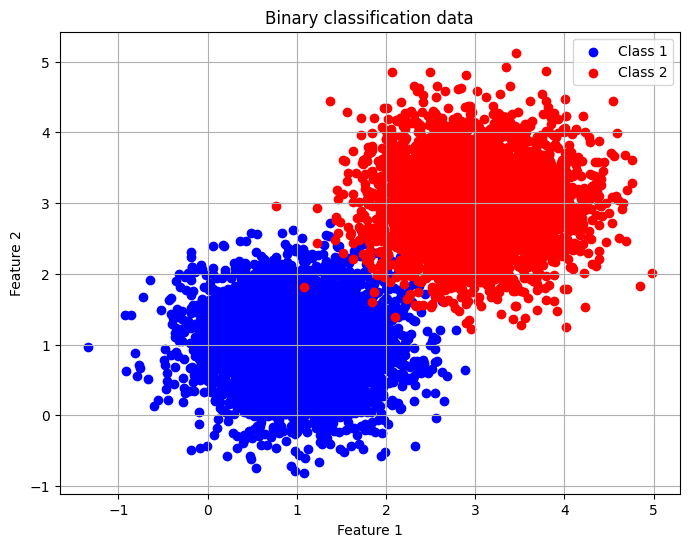

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


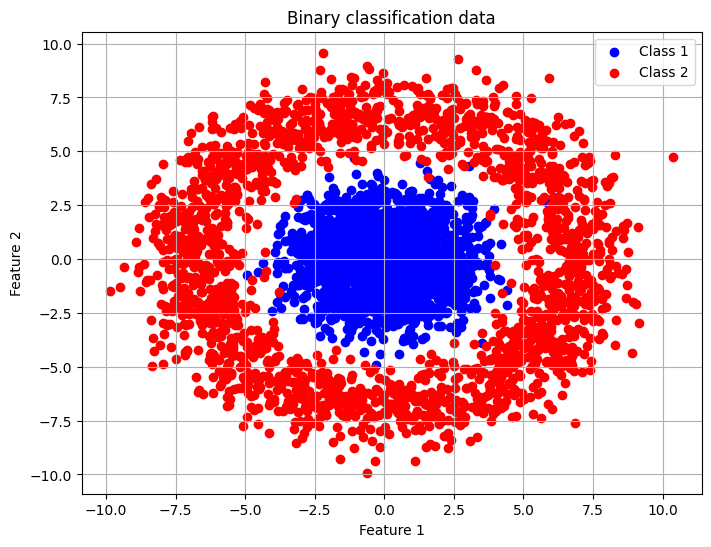

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



<ipython-input-93-1b0ed0e53b24>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z + epsilon))


Accuracy:0.732


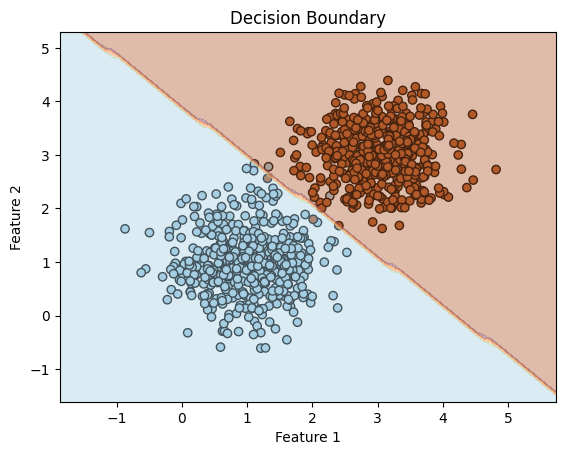

(9000, 2) (9000,)
(1000, 2) (1000,)


In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
def sigmoid(z):
    epsilon=1e-8
    return 1 / (1 + np.exp(-z + epsilon))


def logistic_regression(X_train, y_train, X_test):
    # Add bias term to the feature matrix
    X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Initialize weights randomly
    np.random.seed(47)
    w = np.random.randn(X_train_bias.shape[1])

    # Define parameters
    iter=100
    learning_rate = 0.1

    # Perform gradient descent
    for _ in range(100):
        y_pred = sigmoid(np.dot(X_train_bias, w))
        error = y_train - y_pred
        gradient = np.dot(X_train_bias.T, error)
        w += learning_rate * gradient

    return w

def predict(X, w):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    return sigmoid(np.dot(X_bias, w))

def evaluate_accuracy(y_true, y_pred):
    y_pred_class = (y_pred > 0.5).astype(int)
    accuracy = np.mean(y_true == y_pred_class)
    return accuracy

def plot_decision_boundary(X, y, w):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
    Z = predict(np.c_[xx1.ravel(), xx2.ravel()], w)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.Paired)

    # Add labels and legend
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


w=logistic_regression(tr_data,tr_targets,te_data)

y_pred=predict(te_data,w)

print(f'Accuracy:{evaluate_accuracy(y_pred,te_targets)}')

plot_decision_boundary(te_data, te_targets, w)





##################################################
#Compare the performance of both the models on linearly separable data
##################################################







In [ ]:

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################


def ReLU(x):
    return np.maximum(0, x)



# Forward propagation
def fwdPropagate(inputs, weights):
    W1, W2, W3 = weights
    l1 = np.dot(inputs, W1)
    a1 = ReLU(l1)
    l2 = np.dot(a1, W2)
    a2 = ReLU(l2)
    l3 = np.dot(a2, W3)
    a3 = sigmoid(l3)
    return [l1, a1, l2, a2, l3, a3]


# Compute gradients
def computeGradients(inputs, targets, weights, activations):
    W1, W2, W3 = weights
    l1, a1, l2, a2, l3, a3 = activations

    m = inputs.shape[0]
    scores = sigmoid(l3)
    loss = -np.mean(targets * np.log(scores + 1e-8) + (1 - targets) * np.log(1 - scores + 1e-8))

    dj_dl3 = scores - targets.reshape(-1,1)

    dj_dw3 = np.dot( dj_dl3.T,a2)
    dj_da2 = np.dot(dj_dl3, W3.T)
    dj_dl2 = dj_da2 * (l2 > 0)
    dj_dw2 = np.dot(a1.T, dj_dl2)
    dj_da1 = np.dot(dj_dl2, W2.T)
    dj_dl1 = dj_da1 * (l1 > 0)
    dj_dw1 = np.dot(inputs.T, dj_dl1)

    return [dj_dw1, dj_dw2, dj_dw3], loss




# Update weights
def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3.T

    return [W1, W2, W3]

# Backpropagation
def backPropagate(inputs, targets, weights,activations, learning_rate):
    gradients,loss = computeGradients(inputs, targets, weights, activations)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights,loss
##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def linear_training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    num_samples = inputs.shape[0]
    split_index = int(num_samples * train_val_split)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets_idx[:split_index], targets_idx[split_index:]

    # Define weight shapes
    W1_shape = (2, 3)
    W2_shape = (3, 3)
    W3_shape = (3, 1)

    # Initialize weights
    W1 = np.random.randn(*W1_shape) * 0.01
    W2 = np.random.randn(*W2_shape) * 0.01
    W3 = np.random.randn(*W3_shape) * 0.01
    weights = [W1, W2, W3]

    num_batches = int(num_samples*train_val_split // batch_size)
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]
            activations=fwdPropagate(batch_inputs,weights)
            weights,loss= backPropagate(batch_inputs, batch_targets, weights,activations, learning_rate)
            epoch_loss += loss

        # Evaluate on validation data
        val_activations = fwdPropagate(val_inputs, weights)
        val_loss = computeGradients(val_inputs, val_targets, weights, val_activations)[1]

        # Calculate training and validation accuracy
        train_predictions = np.argmax(fwdPropagate(train_inputs, weights)[-1], axis=1)
        train_accuracy = np.mean(train_predictions == train_targets)
        val_predictions = np.argmax(val_activations[-1], axis=1)
        val_accuracy = np.mean(val_predictions == val_targets)

        print(f"Epoch {epoch + 1}/{epochs}: Loss: {epoch_loss / num_batches:.4f} | Validation Loss: {val_loss:.4f} | Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")

    return weights


weights = linear_training(tr_data, tr_targets)

##################################################
#Evaluate the performance on test data
##################################################
activations=fwdPropagate(te_data, weights)
test_predictions = np.argmax(activations[-1], axis=1)
test_accuracy = np.mean(test_predictions == te_targets)
loss = computeGradients(te_data, te_targets, weights, activations)[1]
print(f'test data: Loss={loss},Accuracy={test_accuracy}')

Epoch 1/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.6250 | Validation Accuracy: 0.0000
Epoch 2/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.6250 | Validation Accuracy: 0.0000
Epoch 3/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.6250 | Validation Accuracy: 0.0000
Epoch 4/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.6250 | Validation Accuracy: 0.0000
Epoch 5/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.6250 | Validation Accuracy: 0.0000
Epoch 6/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.6250 | Validation Accuracy: 0.0000
Epoch 7/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.6250 | Validation Accuracy: 0.0000
Epoch 8/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.6250 | Validation Accuracy: 0.0000
Epoch 9/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.6250 | Validation Accuracy: 0.0000
Epoch 10/30: Loss: 

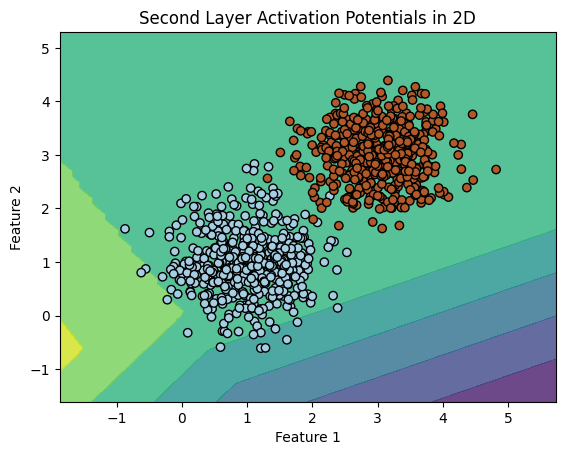

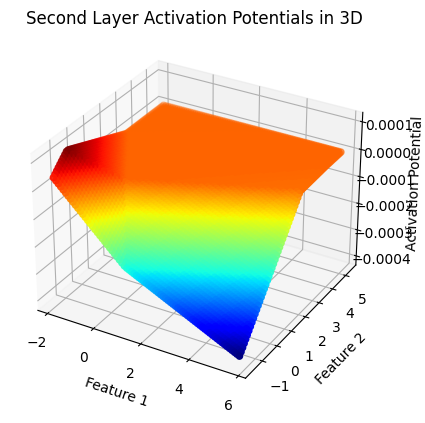

In [ ]:
# Define the range of the input data for visualization
x_min, x_max = min(te_data[:, 0]) - 1, max(te_data[:, 0]) + 1
y_min, y_max = min(te_data[:, 1]) - 1, max(te_data[:, 1]) + 1

# Generate grid points for visualization
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Combine the grid points to create the input data
grid_input = np.c_[xx.ravel(), yy.ravel()]

# Forward propagate the grid input through the network to obtain activation potentials
grid_activations = fwdPropagate(grid_input, weights)[2]

# Reshape the activation potentials to match the grid shape for plotting
Z = grid_activations[:, 0].reshape(xx.shape)

# Plot the activation potentials in 2D
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Second Layer Activation Potentials in 2D')
plt.show()

# Plot the activation potentials in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grid_input[:, 0], grid_input[:, 1], grid_activations[:, 0], c=grid_activations[:, 0], cmap=plt.cm.jet)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Activation Potential')
ax.set_title('Second Layer Activation Potentials in 3D')
plt.show()

<ipython-input-96-2575ff07b33a>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.2425


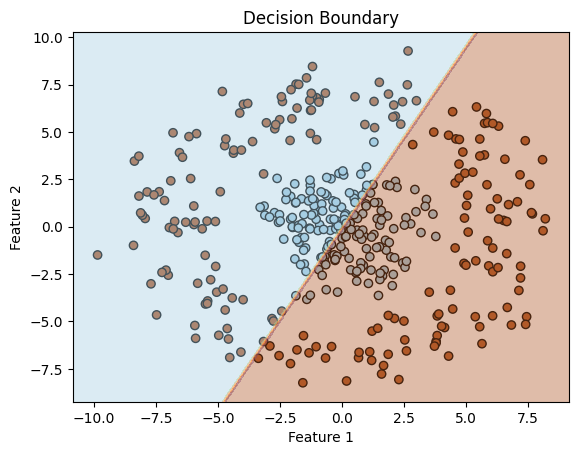

Epoch 1/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.5066 | Validation Accuracy: 0.4889
Epoch 2/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.5066 | Validation Accuracy: 0.4889
Epoch 3/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.5066 | Validation Accuracy: 0.4889
Epoch 4/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.5066 | Validation Accuracy: 0.4889
Epoch 5/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.5066 | Validation Accuracy: 0.4889
Epoch 6/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.5066 | Validation Accuracy: 0.4889
Epoch 7/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.5066 | Validation Accuracy: 0.4889
Epoch 8/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.5066 | Validation Accuracy: 0.4889
Epoch 9/30: Loss: 0.6931 | Validation Loss: 0.6931 | Training Accuracy: 0.5066 | Validation Accuracy: 0.4889
Epoch 10/30: Loss: 

In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################


# Concatenate the data and labels
class1_labels = np.zeros(len(class1_data))  # Label for class 1
class2_labels = np.ones(len(class2_data))   # Label for class 2
X = np.concatenate([class1_data, class2_data], axis=0)
y = np.concatenate([class1_labels, class2_labels])

# Set the random seed for reproducibility
np.random.seed(47)

# Shuffle the indices
indices = np.random.permutation(len(X))

# Determine the split index for training and testing data
split_index = int(0.9 * len(X))  # 90% for training, 10% for testing

# Split the indices into training and testing indices
train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Split the data and labels into training and testing sets
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


w=logistic_regression(X_train,y_train,X_test)

y_pred=predict(X_test,w)

print(f'Accuracy:{evaluate_accuracy(y_pred,y_test)}')

plot_decision_boundary(X_test, y_test, w)






##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

weights = linear_training(X_train, y_train)



activations=fwdPropagate(X_test, weights)
test_predictions = np.argmax(activations[-1], axis=1)
test_accuracy = np.mean(test_predictions == y_test)
loss = computeGradients(X_test, y_test, weights, activations)[1]
print(f'test data: Loss={loss},Accuracy={test_accuracy}')


##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










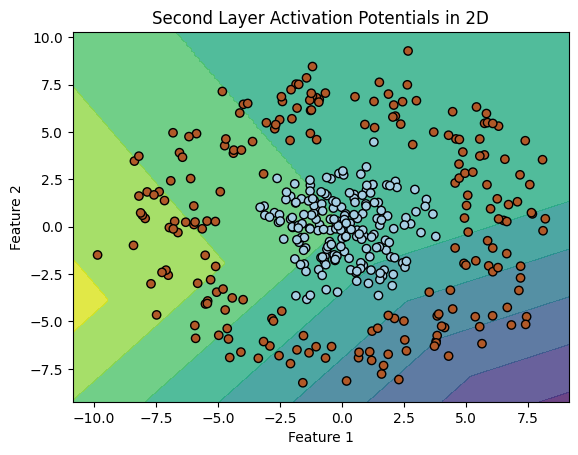

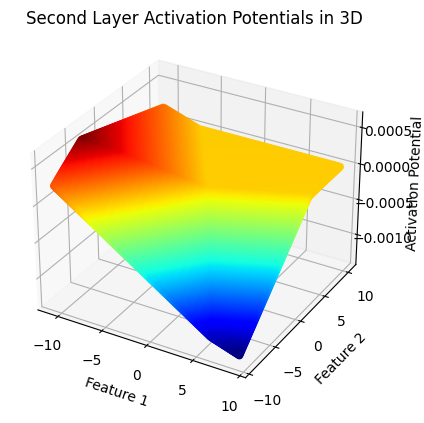

In [ ]:
# Define the range of the input data for visualization
x_min, x_max = min(X_test[:, 0]) - 1, max(X_test[:, 0]) + 1
y_min, y_max = min(X_test[:, 1]) - 1, max(X_test[:, 1]) + 1

# Generate grid points for visualization
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Combine the grid points to create the input data
grid_input = np.c_[xx.ravel(), yy.ravel()]

# Forward propagate the grid input through the network to obtain activation potentials
grid_activations = fwdPropagate(grid_input, weights)[2]

# Reshape the activation potentials to match the grid shape for plotting
Z = grid_activations[:, 0].reshape(xx.shape)

# Plot the activation potentials in 2D
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Second Layer Activation Potentials in 2D')
plt.show()

# Plot the activation potentials in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grid_input[:, 0], grid_input[:, 1], grid_activations[:, 0], c=grid_activations[:, 0], cmap=plt.cm.jet)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Activation Potential')
ax.set_title('Second Layer Activation Potentials in 3D')
plt.show()

<b> Report your observations </b>

1.

2.

3.

